In [14]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from scipy import stats

In [15]:
df = pd.read_csv('../data/commits_transformed.csv', 
                 index_col='date', 
                 parse_dates=['date'],
                 infer_datetime_format=True)

In [16]:
df

,total_deletions,total_additions,total,private,fork,size,watchers_count,has_issues,has_downloads,has_wiki,...,language_JavaScript_derivate,language_PHP_derivate,language_Perl_derivate,language_Python_derivate,language_R_derivate,language_Ruby_derivate,language_Scala_derivate,language_Shell_derivate,language_TypeScript_derivate,results
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31 04:46:46,3,2,5,0,0,188,298,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-31 04:32:15,2,3,5,0,0,188,298,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2013-02-03 03:03:09,0,15,15,0,0,240,194,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-10-10 15:35:05,0,8,8,0,0,188,298,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-10-10 15:32:28,1,1,2,0,0,188,298,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-02-03 03:01:33,0,1,1,0,0,240,194,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-29 17:02:48,0,1,1,0,0,240,194,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013-01-29 17:02:15,0,1,1,0,0,240,194,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-04-08 02:29:18,0,2,2,0,0,236,3129,0,1,0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1


In [17]:
seed = 7
array = df.values
X = array[:,0:74]
Y = array[:,74]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
#scoring = 'accuracy'.
scoring = 'roc_auc'

In [19]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

LR: 0.503750 (0.002425)
KNN: 0.587911 (0.002689)
CART: 0.539575 (0.003508)
NB: 0.549170 (0.003090)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increa

SVM: 0.499032 (0.030346)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/l

RF: 0.597409 (0.002655)


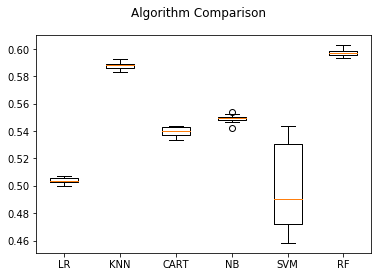

In [20]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig.savefig('baseline-algorithms.png')

In [21]:
dtc = LogisticRegression()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7915868438565005
[[157016      0]
 [ 41340      0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    157016
         1.0       0.00      0.00      0.00     41340

   micro avg       0.79      0.79      0.79    198356
   macro avg       0.40      0.50      0.44    198356
weighted avg       0.63      0.79      0.70    198356



/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
dtc = LinearDiscriminantAnalysis()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.7915868438565005
[[157016      0]
 [ 41340      0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    157016
         1.0       0.00      0.00      0.00     41340

   micro avg       0.79      0.79      0.79    198356
   macro avg       0.40      0.50      0.44    198356
weighted avg       0.63      0.79      0.70    198356



/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
dtc = KNeighborsClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7592056706124342
[[144319  12697]
 [ 35066   6274]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86    157016
         1.0       0.33      0.15      0.21     41340

   micro avg       0.76      0.76      0.76    198356
   macro avg       0.57      0.54      0.53    198356
weighted avg       0.71      0.76      0.72    198356



In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6910504345721833
[[125923  31093]
 [ 30189  11151]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80    157016
         1.0       0.26      0.27      0.27     41340

   micro avg       0.69      0.69      0.69    198356
   macro avg       0.54      0.54      0.54    198356
weighted avg       0.69      0.69      0.69    198356



In [25]:
svn = GaussianNB()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.22425336264090825
[[  3840 153176]
 [   698  40642]]
              precision    recall  f1-score   support

         0.0       0.85      0.02      0.05    157016
         1.0       0.21      0.98      0.35     41340

   micro avg       0.22      0.22      0.22    198356
   macro avg       0.53      0.50      0.20    198356
weighted avg       0.71      0.22      0.11    198356



In [26]:
svn = LinearSVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6945088628526488
[[127248  29768]
 [ 30828  10512]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81    157016
         1.0       0.26      0.25      0.26     41340

   micro avg       0.69      0.69      0.69    198356
   macro avg       0.53      0.53      0.53    198356
weighted avg       0.69      0.69      0.69    198356



In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7592056706124342
[[144319  12697]
 [ 35066   6274]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86    157016
         1.0       0.33      0.15      0.21     41340

   micro avg       0.76      0.76      0.76    198356
   macro avg       0.57      0.54      0.53    198356
weighted avg       0.71      0.76      0.72    198356



In [14]:
# Normalize z-value (all columns)
# Logistic Regression on the data
# Run xgboost (expect better results)
# Table with all algorithm
# Compare features (with xgboost x shap value)
# Write the paper